<div>
<img src="Tango.png" width="500"/>
</div>


# TANGO E2ES Nitro -- MRD

Mission Requirement Document requirement analysis. The following requirements are analysed:


 - MRD-L2-0050

 - MRD-L2-0100  

 - MRD-L2-0110  

 - MRD-L1B-0190  

 - MRD-L1B-0200  
 
 - MRD-L1B-0210  


**Table of contents**<a id='toc0_'></a>    
- 1. [Reference](#toc1_)    
- 2. [Initialisation](#toc2_)    
  - 2.1. [Setup environment](#toc2_1_)    
  - 2.2. [Import TEDS modules](#toc2_2_)    
  - 2.3. [Load configuration file](#toc2_3_)    
- 3. [Geometry Module (GM)](#toc3_)    
- 4. [Scene Generation Module (SGM)](#toc4_)    
  - 4.1. [Config](#toc4_1_)    
  - 4.2. [Run](#toc4_2_)    
- 5. [Instrument Module (IM)](#toc5_)    
  - 5.1. [IM config](#toc5_1_)    
  - 5.2. [IM run](#toc5_2_)    
  - 5.3. [IM visualisation](#toc5_3_)    
- 6. [L1A to L1B Processor](#toc6_)    
  - 6.1. [L1B config](#toc6_1_)    
  - 6.2. [L1B run](#toc6_2_)    
  - 6.3. [L1B requirements](#toc6_3_)    
  - 6.4. [SNR](#toc6_4_)    
  - 6.5. [ARA](#toc6_5_)    
  - 6.6. [ESRA](#toc6_6_)    
- 7. [L1B to L2 Processor](#toc7_)    
  - 7.1. [L2 config](#toc7_1_)    
  - 7.2. [L2 run](#toc7_2_)    
  - 7.3. [L2 requirements](#toc7_3_)    
  - 7.4. [Noise included:](#toc7_4_)    
  - 7.5. [Noise excluded:](#toc7_5_)    
- 8. [Conclusions](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Reference](#toc0_)
+ Laasner R., Landgraf, J., Borsdorff, T., Leune, B., van Amelrooy, E., van Hoek, M., Ludewig, A., Veefkind P.: Algorithm Theoretical Baseline Document for TANGO End-to-End Simulator, SRON-ESG-TN-2022-012, TANGO Mission Consortium, The Netherlands, 2024
+ Developers manual <a href="https://teds.rtfd.io/"> online document</a>

## 2. <a id='toc2_'></a>[Initialisation](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Setup environment](#toc0_)

- Start a Python virtual environment, with the packages from `requirements.txt` installed.
- Make sure the Jupyter notebook / lab is started from this virtual environment using: `jupyter lab`
- Select Python 3 ipykernel as kernel in the Jupyter notebook.
- Enter the full path to the teds directory below

In [1]:
import sys
import os
import yaml
import subprocess
import copy
import pandas as pd
from scipy.interpolate import CubicSpline
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

teds_path = "/usr/people/leune/tango/tango_e2e/teds/teds"

# add TEDS to Python path
os.chdir(teds_path)
sys.path.append("..")

# Set figure DPI for notebook to reduce figure size
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

### 2.2. <a id='toc2_2_'></a>[Import TEDS modules](#toc0_)

In [2]:
from teds.gm import geometry_module
from teds.sgm.sgm_no2 import scene_generation_module_nitro
from teds.l1l2.l1bl2_no2 import l1bl2_no2
from teds.pam.pam import pam_nitro
from teds import run_E2E

### 2.3. <a id='toc2_3_'></a>[Load configuration file](#toc0_)
The configuration file `cfg/nitro/mrd_ref.yaml` contains the configuration for all simulator modules.

Below we print the general I/O files.

In [13]:
cfg_file = '../cfg/nitro/mrd_ref.yaml'
cfg = yaml.safe_load(open(cfg_file))

print(yaml.dump(cfg['io']))

base_dir: ../data/no2/mrd_ref/L_ref/
binning_table: ../data/no2/ckd/binning_table_no2.nc
ckd: ../data/no2/ckd/ckd_nitro.nc
ckd_im: ../data/no2/ckd/ckd_nitro.nc
gm: geometry.nc
im_algo_output: im_l1x_{algo_name}.nc
l1a: l1a.nc
l1b: l1b.nc
l1b_algo_output: l1b_l1x_{algo_name}.nc
l2: l2.nc
sgm_atm: sgm_atmosphere.nc
sgm_atm_raw: sgm_atmosphere_raw.nc
sgm_rad: sgm_radiance.nc



## 3. <a id='toc3_'></a>[Geometry Module (GM)](#toc0_)

For the reference scene we only simulate 2 scanlines

In [4]:
cfg_gm = run_E2E.get_specific_config(cfg,'gm')
print(yaml.dump(cfg_gm))
geometry_module(cfg_gm)

header:
  file_name: mrd_ref.yaml
  version: '0.000'
io:
  gm: ../data/no2/mrd_ref/L_ref/geometry.nc
orbit:
  arg_perigee: 0.0
  drag_coeff: 0.0
  eccentricity: 0.0
  epoch: 2022-08-12 12:00:00
  ltan: 13.823
  mean_anomaly: 0.0
  mean_motion_dot: 0.0
  propagation_duration: 1.67
  sat_height: 500.0
profile: orbit
sensors:
  sensor_00__00:
    end_time: 13.731
    integration_time: 0.04
    n_ground_pixels: 100
    pitch: 0.0
    roll: 0.0
    start_time: 13.73
    swath_width: 30.0
    yaw: 0.0

17:10:03 : teds : gm: INFO : propagate orbit...
17:10:06 : teds : gm: INFO : defining sensor sensor_00__00
17:10:06 : teds : gm: INFO : compute the ground pixels (gpx)
17:10:06 : teds : libOrbSim: INFO :     satellite position
17:10:06 : teds : libOrbSim: INFO :     satellite ground points
17:10:06 : teds : libOrbSim: INFO :     viewing angles
17:10:06 : teds : libOrbSim: INFO :     solar angles
17:10:06 : teds : gm: INFO : Writing geometry data to ../data/no2/mrd_ref/L_ref/geometry.nc.
17:10:

## 4. <a id='toc4_'></a>[Scene Generation Module (SGM)](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Config](#toc0_)

We overwrite the scene with the  **L_ref** reference scene (see MRD Annex B):

| Parameter | Value     |
| --------  | -------   |
| SZA       |  70 deg   |
| VZA       |  0 deg    |
| RAA       |  0 deg    |
| albedo    |  0.05     |
| NO2 column|  1.43E15 molec./cm2     |
| O3 column |  300 DU     |

In [5]:
cfg_sgm = run_E2E.get_specific_config(cfg,'sgm')
cfg_sgm['mrd_ref_scene'] = 'L_ref'
print(yaml.dump(cfg_sgm))

atm:
  afgl:
    dzlay: 1000
    nlay: 30
  cams_datetime: 2023-05-23 09:30:00
  cloud:
    act:
      start: 0
      stop: 50
    alt:
      start: 0
      stop: 5
    cloud_bottom_pressure: 900
    cloud_fraction: 1.0
    cloud_optical_thickness: 10.0
    cloud_top_pressure: 800
    use: false
  gases:
  - no2
  - o3
  microHH:
    gases:
    - no2
    use: false
  type: afgl
  use_dem: false
header:
  file_name: mrd_ref.yaml
  version: '0.000'
io:
  afgl: ../data/no2/prof.AFGL.US.std
  albedo: ../data/no2/albedo_jaenschwalde.nc
  cams: ../data/cams/cams_global_forecast_20230523.nc
  dem: ../data/no2/dem.nc
  disamar_cfg_template: ../cfg/nitro/disamar_config_sim.in_template
  disamar_exe: ../data/no2/disamar/Disamar_old.exe
  gm: ../data/no2/mrd_ref/L_ref/geometry.nc
  microHH_filesuffix: src3_20180523_0930
  microHH_folder: ../data/no2/microHH/Jaenschwalde/
  mrd_prof: ../cfg/nitro/no2_camelot_polluted.dat
  mrd_ref_spec: ../cfg/nitro/TANGO_reference_spectra.xlsx
  sgm_atm: ../data/

### 4.2. <a id='toc4_2_'></a>[Run](#toc0_)

In [6]:
# set library path for ifort, specific for KNMI workstation
# for using ifort DISAMAR
os.environ['LD_LIBRARY_PATH'] = '/opt/intel/oneapi/compiler/2022.1.0/linux/lib:/opt/intel/oneapi/compiler/2022.1.0/linux/lib/x64:/opt/intel/oneapi/compiler/2022.1.0/linux/compiler/lib/intel64_lin'

scene_generation_module_nitro(cfg_sgm)

17:10:07 : teds : sgm_no2: INFO : Starting SGM calculation
17:10:07 : teds : sgm_no2: INFO : Pixels along track: 2 ; Pixels across track: 100
17:10:09 : teds : libSGM: INFO : Sentinel 2 band B01:
17:10:09 : teds : libSGM: INFO :   Projecting to WSG84
17:10:09 : teds : libSGM: INFO :   Interpolating to MicroHH grid
17:10:09 : teds : libSGM: INFO : Sentinel 2 band B02:
17:10:09 : teds : libSGM: INFO :   Projecting to WSG84
17:10:11 : teds : libSGM: INFO :   Interpolating to MicroHH grid
17:10:11 : teds : sgm_no2: INFO : Loading afgl atmosphere: ../data/no2/prof.AFGL.US.std
17:10:11 : teds : sgm_no2: INFO : Writing raw scene atmosphere: ../data/no2/mrd_ref/L_ref/sgm_atmosphere_raw.nc
17:10:11 : teds : sgm_no2: INFO : Radiative transfer simulation
17:10:11 : teds : sgm_no2: INFO : Creating config files DISAMAR
17:10:11 : teds : sgm_no2: INFO : Creating tmp directory DISAMAR: ../data/no2/tmp//20250217T171011
17:10:15 : teds : sgm_no2: INFO : Running DISAMAR


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:31<00:00,  1.32it/s]

17:12:47 : teds : sgm_no2: INFO : Reading DISAMAR output
17:12:47 : teds : sgm_no2: INFO : Cleaning up tmp directory DISAMAR
17:12:47 : teds : sgm_no2: INFO : Writing scene radiance to: ../data/no2/mrd_ref/L_ref/sgm_radiance.nc
17:12:47 : teds : sgm_no2: INFO : Adjusting scene to MRD ref spec


17:12:47 : teds : sgm_no2: INFO : SGM calculation finished in 160.9 s


## 5. <a id='toc5_'></a>[Instrument Module (IM)](#toc0_)

### 5.1. <a id='toc5_1_'></a>[IM config](#toc0_)
Two runs are done with the IM:
1. **Nominal config (including noise)**
2. **Without added noise**

In [7]:
cfg_im = copy.deepcopy(run_E2E.get_specific_config(cfg,'im'))
print(yaml.dump(cfg_im))

im_config_file = f"{os.path.dirname(cfg_file)}/im_config_temp.yaml"
with open(im_config_file,'w') as outfile:
    yaml.dump(cfg_im, outfile) 

detector:
  binning_table_id: 1
  exposure_time: 0.021
  nr_coadditions: 1
do_python: false
header:
  file_name: mrd_ref.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/mrd_ref/L_ref/geometry.nc
  l1a: ../data/no2/mrd_ref/L_ref/l1a.nc
  sgm: ../data/no2/mrd_ref/L_ref/sgm_radiance.nc
processing_version: 0.0
proctable:
  algo_list: algos_im
  file: ../cfg/nitro/proctable.yaml



In [14]:
cfg_nonoise = copy.deepcopy(cfg)
cfg_nonoise['im']['proctable']['file'] = '../cfg/nitro/proctable_nonoise.yaml'
cfg_nonoise['io']['l1a']= 'l1a_nonoise.nc'
cfg_nonoise['io']['l1b']= 'l1b_nonoise.nc'
cfg_nonoise['io']['l2']= 'l2_nonoise.nc'


cfg_im_nonoise = copy.deepcopy(run_E2E.get_specific_config(cfg,'im'))
print(yaml.dump(cfg_im_nonoise))

im_config_file_nonoise = f"{os.path.dirname(cfg_file)}/im_config_temp_nonoise.yaml"
with open(im_config_file_nonoise,'w') as outfile:
    yaml.dump(cfg_im_nonoise, outfile)

detector:
  binning_table_id: 1
  exposure_time: 0.021
  nr_coadditions: 1
do_python: false
header:
  file_name: mrd_ref.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/mrd_ref/L_ref/geometry.nc
  l1a: ../data/no2/mrd_ref/L_ref/l1a.nc
  sgm: ../data/no2/mrd_ref/L_ref/sgm_radiance.nc
processing_version: 0.0
proctable:
  algo_list: algos_im
  file: ../cfg/nitro/proctable.yaml



### 5.2. <a id='toc5_2_'></a>[IM run](#toc0_)

In [9]:
subprocess.run(["../build/teds/im/tango_im.x", im_config_file], check=True)
subprocess.run(["../build/teds/im/tango_im.x", im_config_file_nonoise], check=True)

NITRO DRIVER
##########################
# Tango instrument model #
##########################
Version                 : 0.0.1
Commit hash             : d60aeae2
Date and timezone       : 2025 February 17 Mon UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.12.10-100.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/im/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Binning table file      : ../data/no2/ckd/binning_table_no2.nc

##############################
# Reading CKD and input data #
##############################
[17:12:48]  Reading dark CKD


[17:12:48]  Reading noise CKD
[17:12:48]  Reading dark CKD
[17:12:48]  Reading stray light CKD
[17:12:48]  Reading swath CKD
[17:12:48]  Reading spectral CKD
[17:12:48]  Reading radiometric CKD
[17:12:48]  Reading ISRF CKD

################################
# Initialize the binning table #
################################
[17:12:49]  Input data calibration level: SGM
[17:12:49]  Input data calibration level: SGM
[17:12:49]  Reading Metadata
[17:12:49]  Reading Scene Data
[17:12:49]  proctable_file: ../cfg/nitro/proctable.yaml 
[17:12:49]  algo_list_name: algos_im 

####################
# Instrument Model #
####################
[17:12:50]  [warning] Noise, binning not yet taken into account
[17:12:50]  [warning] Noise, binning not yet taken into account
[17:12:51]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:12:51]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:12:51]  Processing images 100.0%
[17:12:51]  
[17:12:51]  Timings:

[17:12:53]  Reading noise CKD
[17:12:53]  Reading dark CKD
[17:12:53]  Reading stray light CKD
[17:12:54]  Reading swath CKD
[17:12:54]  Reading spectral CKD
[17:12:54]  Reading radiometric CKD
[17:12:54]  Reading ISRF CKD

################################
# Initialize the binning table #
################################
[17:12:55]  Input data calibration level: SGM
[17:12:55]  Input data calibration level: SGM
[17:12:55]  Reading Metadata
[17:12:55]  Reading Scene Data
[17:12:55]  proctable_file: ../cfg/nitro/proctable.yaml 
[17:12:55]  algo_list_name: algos_im 

####################
# Instrument Model #
####################
[17:12:56]  [warning] Noise, binning not yet taken into account
[17:12:56]  [warning] Noise, binning not yet taken into account
[17:12:56]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:12:56]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:12:56]  Processing images 100.0%
[17:12:56]  
[17:12:56]  Timings:

CompletedProcess(args=['../build/teds/im/tango_im.x', '../cfg/nitro/im_config_temp_nonoise.yaml'], returncode=0)

### 5.3. <a id='toc5_3_'></a>[IM visualisation](#toc0_)

17:13:59 : teds : pam: INFO : Starting PAM
17:13:59 : teds : pam: INFO : Plotting L1A


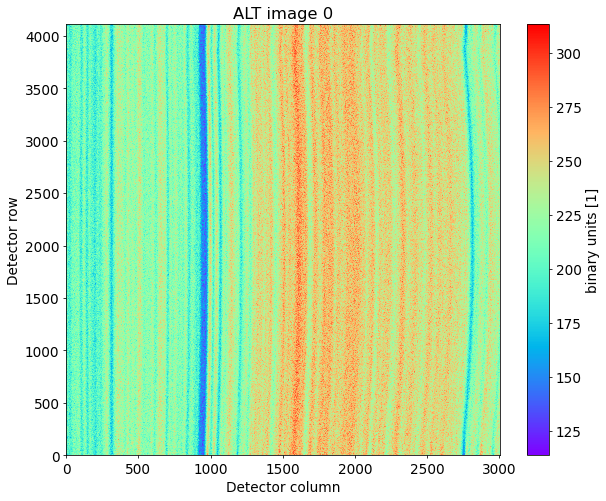

17:14:01 : teds : pam: INFO : Finished PAM


In [15]:
cfg_im_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_im_pam['im']['run'] = True
pam_nitro(cfg_im_pam)

## 6. <a id='toc6_'></a>[L1A to L1B Processor](#toc0_)

### 6.1. <a id='toc6_1_'></a>[L1B config](#toc0_)
Run L1B for the nominal and without noise L1A

In [11]:
cfg_l1b = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1al1b'))

print(yaml.dump(cfg_l1b))

l1b_config_file = f"{os.path.dirname(cfg_file)}/l1b_config_temp.yaml"
with open(l1b_config_file,'w') as outfile:
    yaml.dump(cfg_l1b, outfile)

cfg_l1b_nonoise = copy.deepcopy(run_E2E.get_specific_config(cfg_nonoise,'l1al1b'))

print(yaml.dump(cfg_l1b_nonoise))

l1b_config_file_nonoise = f"{os.path.dirname(cfg_file)}/l1b_config_temp_nonoise.yaml"
with open(l1b_config_file_nonoise,'w') as outfile:
    yaml.dump(cfg_l1b_nonoise, outfile)

do_python: false
header:
  file_name: mrd_ref.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/mrd_ref/L_ref/geometry.nc
  l1a: ../data/no2/mrd_ref/L_ref/l1a.nc
  l1b: ../data/no2/mrd_ref/L_ref/l1b.nc
processing_version: 0.0
proctable:
  algo_list: algos_l1b
  file: ../cfg/nitro/proctable.yaml

do_python: false
header:
  file_name: mrd_ref.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/mrd_ref/L_ref/geometry.nc
  l1a: ../data/no2/mrd_ref/L_ref/l1a_nonoise.nc
  l1b: ../data/no2/mrd_ref/L_ref/l1b_nonoise.nc
processing_version: 0.0
proctable:
  algo_list: algos_l1b
  file: ../cfg/nitro/proctable.yaml



### 6.2. <a id='toc6_2_'></a>[L1B run](#toc0_)

In [17]:
subprocess.run(["../build/teds/l1al1b/tango_l1b.x", l1b_config_file], check=True)
subprocess.run(["../build/teds/l1al1b/tango_l1b.x", l1b_config_file_nonoise], check=True)

NITRO DRIVER
#######################
# Tango L1B processor #
#######################
Version                 : 0.0.1
Commit hash             : d60aeae2
Date and timezone       : 2025 February 17 Mon UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.12.10-100.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/l1al1b/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Linking against         : /usr/lib64/libnetcdf_c++4.so
                          /usr/lib64/libnetcdf.so
                          /usr/lib64/liblapack.so
                          OpenMP::OpenMP_CXX
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/spdlog-src/include
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/yaml-cpp-src/include
 

[17:15:32]  Reading noise CKD
[17:15:32]  Reading dark CKD
[17:15:32]  Reading stray light CKD
[17:15:32]  Reading swath CKD
[17:15:32]  Reading spectral CKD
[17:15:32]  Reading radiometric CKD
[17:15:32]  Reading ISRF CKD
[17:15:32]  CKD initialized
[17:15:32]  Input data calibration level: L1A
[17:15:32]  Input data calibration level: L1A
[17:15:32]  Reading Metadata
[17:15:32]  Reading Science Data

#############
# Retrieval #
#############
[17:15:36]  proctable_file: ../cfg/nitro/proctable.yaml 
[17:15:36]  algo_list_name: algos_l1b 
[17:15:36]  [warning] Noise, binning not yet taken into account
[17:15:36]  [warning] Noise, binning not yet taken into account
[17:15:36]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:15:36]  [warning] Conversion factor (bits or counts -> voltage) not implemented
[17:15:36]  [warning] Algorithm Non_Linearity not found, check BuildAlgo and proctable
[17:15:36]  [warning] Algorithm Non_Linearity not found, check BuildAlgo 

CompletedProcess(args=['../build/teds/l1al1b/tango_l1b.x', '../cfg/nitro/l1b_config_temp_nonoise.yaml'], returncode=0)

### 6.3. <a id='toc6_3_'></a>[L1B requirements](#toc0_)

### 6.4. <a id='toc6_4_'></a>[SNR](#toc0_)
❌/✅ **MRD-L1B-0190**: *The VIS level 1B average signal-to-noise ratio of the spectrum, shall be at least SNR1 = 400 and SNR2 = 240 for the radiance levels L1=1.70E13 and L2 =6.24E12 photons/(sr cm2 nm s).*


Note 1: Using SNR2 here. Lref scene only has radiance level L2.

Note 2: using noise conversion gain in CKD from Carbon instrument

1. **Using propagated noise.**

17:17:15 : teds : pam: INFO : Starting PAM
17:17:15 : teds : pam: INFO : Plotting L1B


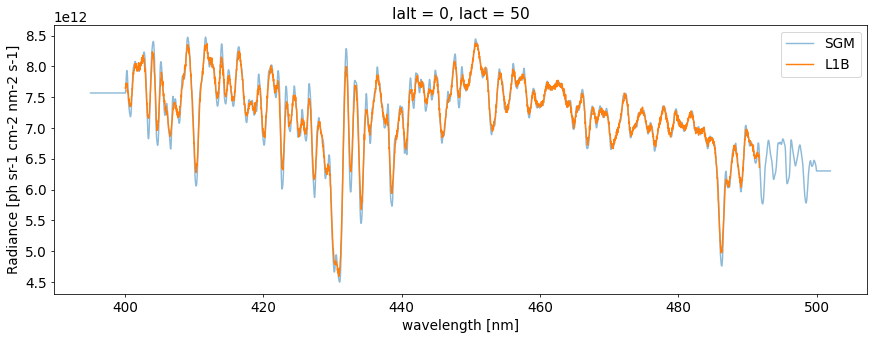

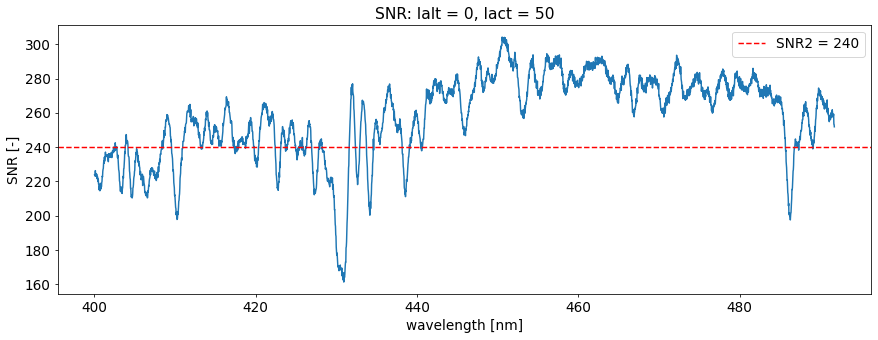

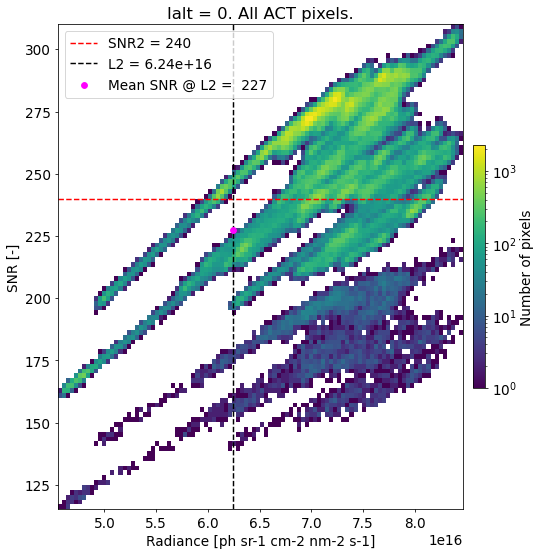

17:17:16 : teds : pam: INFO : Finished PAM


In [18]:
cfg_l1b_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l1b_pam['l1b']['run'] = True
cfg_l1b_pam['l1b']['plot_options'] = ['spectrum','snr_req']
cfg_l1b_pam['l1b']['ialt'] = 0
cfg_l1b_pam['l1b']['iact'] = 50

pam_nitro(cfg_l1b_pam)

2. **Using statistical noise**: comparing with and without noise L1B

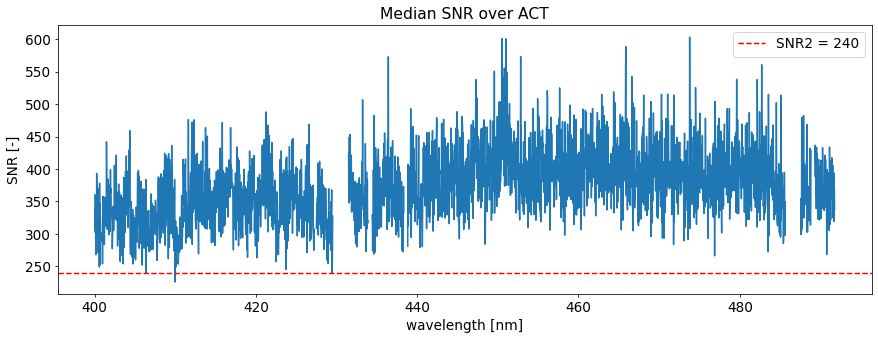

In [19]:
ialt = 0
iact = 50

cfg_l1b_pam_nonoise = copy.deepcopy(run_E2E.get_specific_config(cfg_nonoise,'pam'))

l1b_noise = nc.Dataset(cfg_l1b_pam['io']['l1b'])
l1b_nonoise = nc.Dataset(cfg_l1b_pam_nonoise['io']['l1b'])


wvl1 = l1b_noise['observation_data/wavelength'][:,:] #[nm]
wvl2 = l1b_nonoise['observation_data/wavelength'][:,:]
assert (wvl1 == wvl2).all()

rad1 = l1b_noise['observation_data/radiance'][ialt,:,:] #[ph nm-1 s-1 sr-1 m-2]
rad2 = l1b_nonoise['observation_data/radiance'][ialt,:,:]

error = rad1-rad2
abs_error = np.abs(error)

snr = rad1/abs_error

snr_act = np.ma.median(snr, axis=0)
snr_act[np.where(rad1[iact,:]<6.24E16)] = np.ma.masked 
plt.figure(figsize=(15, 5))
plt.plot(wvl1[iact],snr_act)
plt.xlabel('wavelength [nm]')
plt.ylabel('SNR [-]')
plt.axhline(y=240, color='r', linestyle='--', label = 'SNR2 = 240' )
plt.title(f'Median SNR over ACT', fontsize=16)
plt.legend()
plt.show()

### 6.5. <a id='toc6_5_'></a>[ARA](#toc0_)
✅ **MRD-L1B-0200**: *The absolute radiometric accuracy (ARA) of the VIS-L1B product shall be ≤ 5%*




1.  **Comparing L1B to convolved L_ref**

17:17:30 : teds : pam: INFO : Starting PAM
17:17:30 : teds : pam: INFO : Plotting L1B
17:17:30 : teds : libConv: INFO : Convolving radiance from SGM with ISRF


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:20<00:00, 10.39s/it]


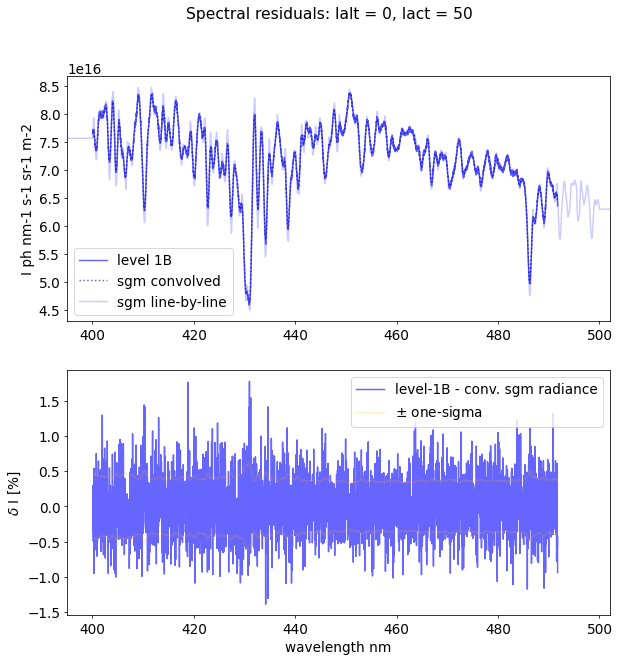

17:17:51 : teds : pam: INFO : Finished PAM


In [20]:
cfg_l1b_pam['l1b']['plot_options'] = ['residuals']
cfg_l1b_pam['l1b']['isrf'] = 'ckd'
cfg_l1b_pam['l1b']['isrf_file'] = './ckd/ckd_generation/data_external/Nominal_ISRF_dataset_17102024.xlsx'
pam_nitro(cfg_l1b_pam)

2. **Comparing L1B with noise to L1B without noise**

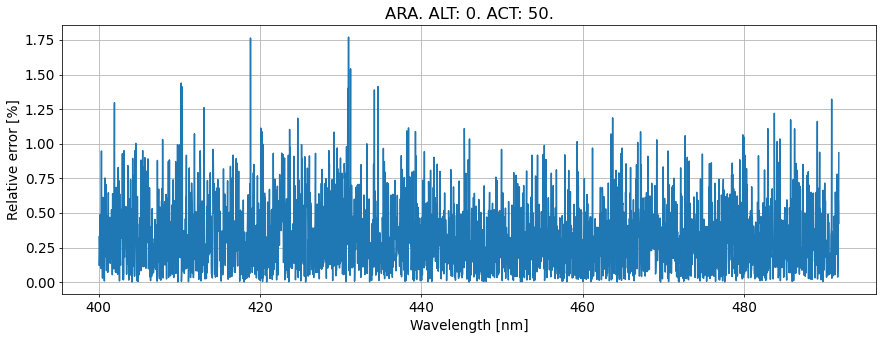

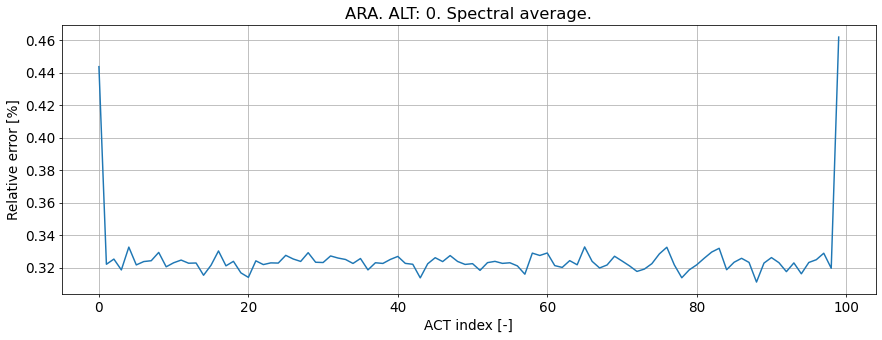

In [21]:
#### calculate ARA
error = rad1-rad2
abs_error = np.abs(error)
rel_error = abs_error/rad2 * 100 # [%]
mean_rel_error= np.mean(rel_error ,axis=-1)

# ARA for one spectrum
plt.figure(figsize=(15,5))
plt.plot(wvl1[iact], rel_error[iact,:])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative error [%]')
plt.title(f'ARA. ALT: {ialt}. ACT: {iact}.' )
plt.grid()
plt.show()

# ARA for one image
plt.figure(figsize=(15,5))
plt.plot(mean_rel_error)
plt.xlabel('ACT index [-]')
plt.ylabel('Relative error [%]')
plt.title(f'ARA. ALT: {ialt}. Spectral average.' )
plt.grid()
plt.show()

### 6.6. <a id='toc6_6_'></a>[ESRA](#toc0_)
✅ **MRD-L1B-0210**: *For a VIS spectral measurement error *dy* the induced NO2 error *G_NO2 \* dy* shall each be ≤ 1.4E15 molec. cm-2 for relative biases within a scene area and ≤ 1.4E15 molec. cm-2 for mean biases of a scene area. Here *dy* includes all radiometric errors other than MRD-L1B-0190 and MRD-L1B-*
0200

Note: whole VIS window has been used, ESRA for just NO2 window would be lower

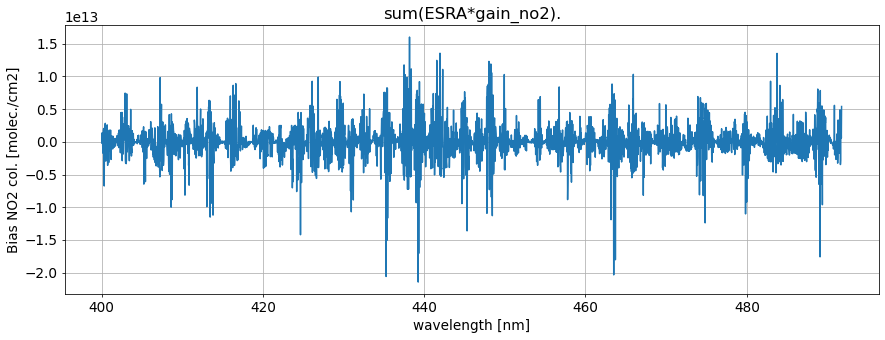

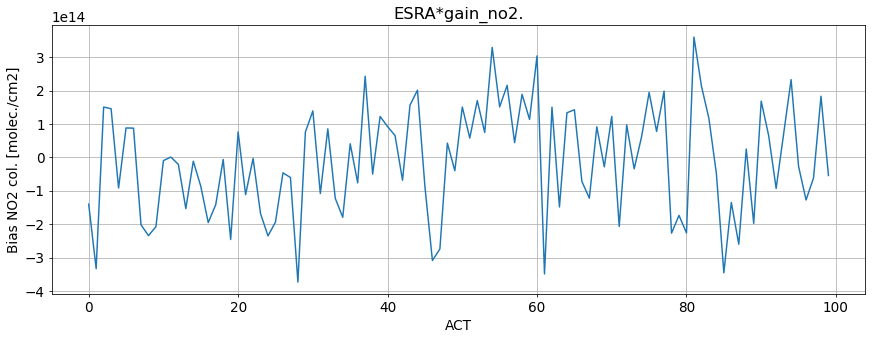

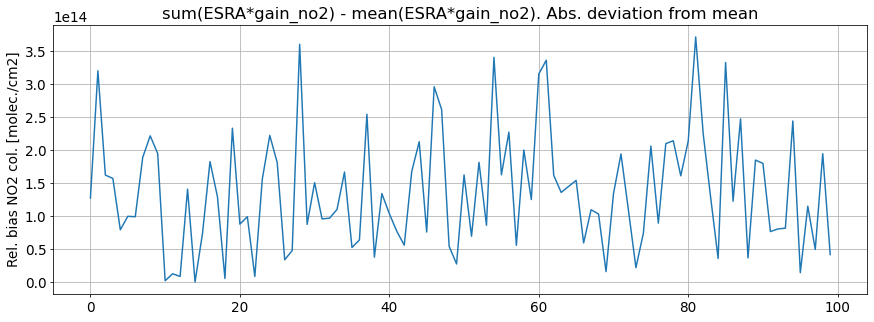

In [22]:
file_gain = '../../../docs/TANGO_reference_gain_vectors.xlsx'
file_spectra = '../../../docs/TANGO_reference_spectra.xlsx'

df1 = pd.read_excel(file_gain, 'TANGO Nitro NO2 Gain', header=1)
data_array1 = np.array(df1)

df2 = pd.read_excel(file_spectra, 'TANGO Nitro', header=4)
data_array2 = np.array(df2)

wvl_gain = data_array1[:,0] # [nm]
gain = data_array1[:,1]  # [molec s nm sr/ ph]
# rad_gain = data_array[:,2] # [ph/s/cm2/nm/sr]

wvl_irr = data_array2[:,0] # [nm]
irr = data_array2[:,1]  # [ph/s/cm²/nm]

# convert gain as function of sun-normalised radiance to radiance
# R = rad/irr*np.pi
assert (wvl_irr == wvl_gain).all()
gain_rad = gain*np.pi/irr 

# interpolate gain to radiance wvl
gain_spline = CubicSpline(wvl_gain, gain_rad)
gain_interp = gain_spline(wvl1)

# subtract mean error in spectrum from abs error to get relative error (ESRA)
esra = abs_error - abs_error.mean(axis=-1)[...,np.newaxis]
esra *= 1e-4 # convert m-2 to cm-2
error_no2 = np.sum(gain_interp*esra,axis=-1)

# ESRA wvl
plt.figure(figsize=(15,5))
plt.plot(wvl1[iact], gain_interp[iact,:]*esra[iact,:])
plt.xlabel('wavelength [nm]')
plt.ylabel('Bias NO2 col. [molec./cm2]')
plt.title(f'sum(ESRA*gain_no2).' )
plt.grid()
plt.show()

# ESRA per ACT
plt.figure(figsize=(15,5))
plt.plot(error_no2)
plt.xlabel('ACT')
plt.ylabel('Bias NO2 col. [molec./cm2]')
plt.title(f'ESRA*gain_no2.' )
plt.grid()
plt.show()

# ESRA deviation from mean per ALT (relative bias)
plt.figure(figsize=(15,5))
plt.plot(np.abs(error_no2-error_no2.mean(axis=-1)[...,np.newaxis]))
plt.ylabel('Rel. bias NO2 col. [molec./cm2]')
plt.title(f'sum(ESRA*gain_no2) - mean(ESRA*gain_no2). Abs. deviation from mean' )
plt.grid()
plt.show()

## 7. <a id='toc7_'></a>[L1B to L2 Processor](#toc0_)

### 7.1. <a id='toc7_1_'></a>[L2 config](#toc0_)
Run L2 for the nominal and without noise L1B

In [23]:
cfg_l2 = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1l2'))
print(yaml.dump(cfg_l2))

cfg_l2_nonoise = copy.deepcopy(run_E2E.get_specific_config(cfg_nonoise,'l1l2'))
print(yaml.dump(cfg_l2_nonoise))

LUT_NN_file: ../data/no2/LUT_NN_combined_20240429.nc
convolve_irr: ISRF
convolve_rad: ISRF
debug:
  log: false
  plot: false
export_spectra: false
gaussian_fwhm: 0.6
header:
  file_name: mrd_ref.yaml
  version: '0.000'
io:
  gm: ../data/no2/mrd_ref/L_ref/geometry.nc
  l1b: ../data/no2/mrd_ref/L_ref/l1b.nc
  l2: ../data/no2/mrd_ref/L_ref/l2.nc
  sgm_atm: ../data/no2/mrd_ref/L_ref/sgm_atmosphere.nc
  sgm_rad: ../data/no2/mrd_ref/L_ref/sgm_radiance.nc
irr_from_sgm: true
isrf_file: ./ckd/ckd_generation/data_external/Nominal_ISRF_dataset_17102024.xlsx
no2:
  convergence_threshold: 1.0
  fit_window:
  - 405.0
  - 465.0
  intensity_coefs: 0
  intensity_scaling_factor: 1.0
  max_iterations: 8
  max_outliers: 10
  polynomial_coefs: 6
  prior:
    doas:
      C0:
      - 1.0
      - 1.0
      C1:
      - 0.125
      - 0.125
      C2:
      - 0.015625
      - 0.015625
      C3:
      - 0.015625
      - 0.015625
      Cring:
      - 0.06
      - 0.2
      Dring:
      - 0.06
      - 0.2
      H20l

### 7.2. <a id='toc7_2_'></a>[L2 run](#toc0_)

In [24]:
l1bl2_no2(cfg_l2)
l1bl2_no2(cfg_l2_nonoise)

17:19:47 : teds : l1bl2_no2 : 84 : WARNING : File ../data/no2/mrd_ref/L_ref/l2.nc already exists, removing
17:19:47 : teds : libConv: INFO : Convolving irradiance from SGM with ISRF
17:19:57 : teds : libDOAS: INFO : === Start IFDOE processing NO2
17:19:57 : teds : libDOAS: INFO : Parameter names: ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'O2O2', 'NO2', 'O3']
17:19:57 : teds : libDOAS: INFO : === Reading ref.spec.
keys of f: dict_keys(['image_attributes', 'observation_data', 'geolocation_data'])
17:19:58 : teds : libDOAS: INFO : === Calibrating solar spectrum
17:20:00 : teds : libDOAS: INFO : === Starting radiance calibration and DOAS
17:20:00 : teds : libDOAS: INFO : Processing with 6 threads
17:20:37 : teds : libDOAS: INFO : Processed scanline 1/2 in 37.03s
17:20:38 : teds : libDOAS: INFO : Processed scanline 2/2 in 37.68s
17:20:38 : teds : libDOAS: INFO : Output witten to ../data/no2/mrd_ref/L_ref/l2.nc
17:20:38 : teds : libDOAS: INFO : IFDOE NO2 calculation finished in 40.4 s
17:20:38 : 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 515587.46it/s]

17:20:41 : teds : l1bl2_no2: INFO : Writing cloud results to: ../data/no2/mrd_ref/L_ref/l2.nc
17:20:41 : teds : l1bl2_no2: INFO : Cloud calculation finished in 0.1 s
17:20:41 : teds : l1bl2_no2: INFO : Reading DOAS results from L2 file: ../data/no2/mrd_ref/L_ref/l2.nc
17:20:41 : teds : l1bl2_no2: INFO : Reading atm file: ../data/no2/mrd_ref/L_ref/sgm_atmosphere.nc
17:20:41 : teds : l1bl2_no2: INFO : Reading cloud results from L2 file: ../data/no2/mrd_ref/L_ref/l2.nc
17:20:41 : teds : l1bl2_no2: INFO : Calculating AMF


17:20:42 : teds : l1bl2_no2: INFO : Writing AMF results to: ../data/no2/mrd_ref/L_ref/l2.nc
17:20:42 : teds : l1bl2_no2: INFO : AMF calculation finished in 1.2 s
17:20:42 : teds : l1bl2_no2: INFO : L1L2 calculation finished in 55.3 s
17:20:42 : teds : l1bl2_no2 : 84 : WARNING : File ../data/no2/mrd_ref/L_ref/l2_nonoise.nc already exists, removing
17:20:42 : teds : libConv: INFO : Convolving irradiance from SGM with ISRF
17:20:52 : teds : libDOAS: INFO : === Start IFDOE processing NO2
17:20:52 : teds : libDOAS: INFO : Parameter names: ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'O2O2', 'NO2', 'O3']
17:20:52 : teds : libDOAS: INFO : === Reading ref.spec.
keys of f: dict_keys(['image_attributes', 'observation_data', 'geolocation_data'])
17:20:52 : teds : libDOAS: INFO : === Calibrating solar spectrum
17:20:54 : teds : libDOAS: INFO : === Starting radiance calibration and DOAS
17:20:54 : teds : libDOAS: INFO : Processing with 6 threads
17:21:09 : teds : libDOAS: INFO : Processed scanline 1/2 in 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 520708.13it/s]

17:21:29 : teds : l1bl2_no2: INFO : Writing cloud results to: ../data/no2/mrd_ref/L_ref/l2_nonoise.nc
17:21:29 : teds : l1bl2_no2: INFO : Cloud calculation finished in 0.0 s
17:21:29 : teds : l1bl2_no2: INFO : Reading DOAS results from L2 file: ../data/no2/mrd_ref/L_ref/l2_nonoise.nc
17:21:29 : teds : l1bl2_no2: INFO : Reading atm file: ../data/no2/mrd_ref/L_ref/sgm_atmosphere.nc
17:21:29 : teds : l1bl2_no2: INFO : Reading cloud results from L2 file: ../data/no2/mrd_ref/L_ref/l2_nonoise.nc
17:21:29 : teds : l1bl2_no2: INFO : Calculating AMF


17:21:30 : teds : l1bl2_no2: INFO : Writing AMF results to: ../data/no2/mrd_ref/L_ref/l2_nonoise.nc
17:21:30 : teds : l1bl2_no2: INFO : AMF calculation finished in 1.1 s
17:21:30 : teds : l1bl2_no2: INFO : L1L2 calculation finished in 48.3 s


### 7.3. <a id='toc7_3_'></a>[L2 requirements](#toc0_)

### 7.4. <a id='toc7_4_'></a>[Noise included:](#toc0_)
✅ **MRD-L2-0050**: *The NO2 tropospheric column shall be measured with a precision < 5E15 molec.cm-2 for the reference scene Lref.*

17:22:36 : teds : pam: INFO : Starting PAM
17:22:36 : teds : pam: INFO : Plotting L2


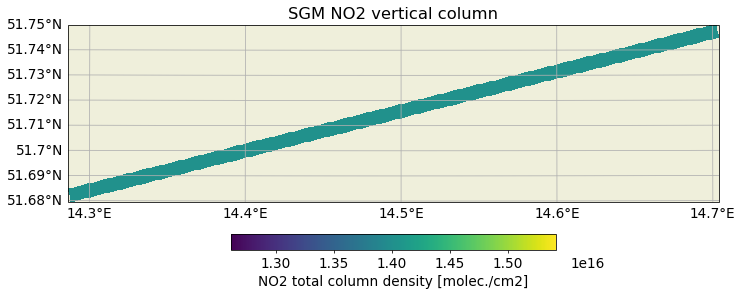

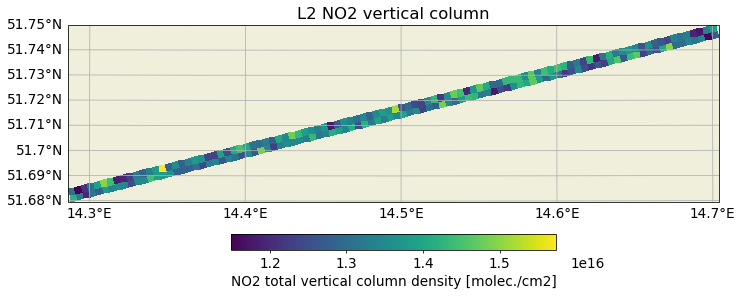

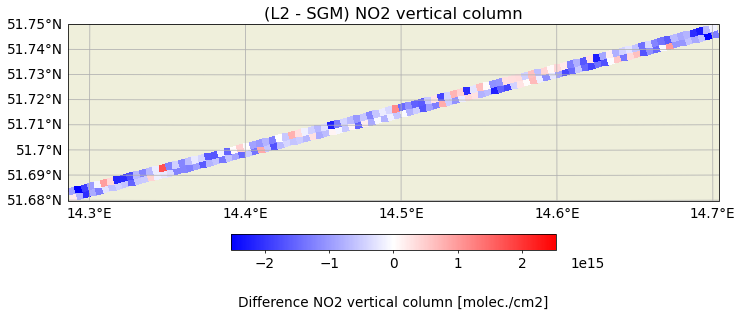

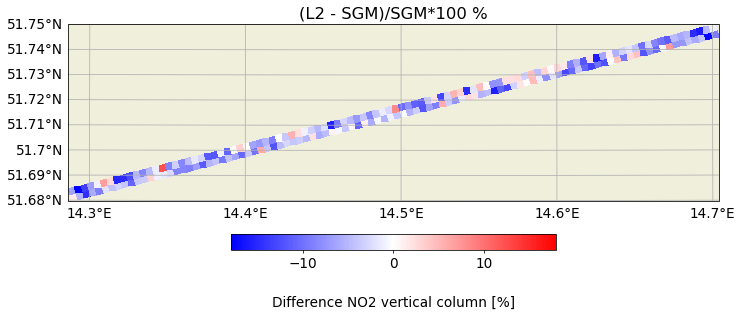

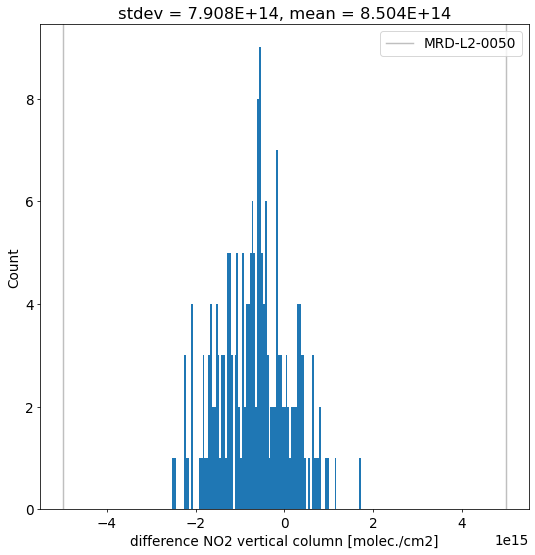

17:22:51 : teds : pam: INFO : Finished PAM


In [25]:
cfg_l2_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l2_pam['l2']['run'] = True
cfg_l2_pam['l2']['plot_list'] = {'NO2 vertical column':{'f1':'sgm_atm', 'f2':'l2', 'f1_name':'SGM', 'f2_name':'L2', 'f1_var':'col_no2', 'f2_var':'no2_total_vcd', 'req':5E15, 'req_name':'MRD-L2-0050'}}
pam_nitro(cfg_l2_pam)

### 7.5. <a id='toc7_5_'></a>[Noise excluded:](#toc0_)
- ✅ **MRD-L2-0100**: *Within a scene area, the relative biases on NO2 tropospheric shall be < 2E15 molec.cm-2 for the reference scene Lref.*
- ✅ **MRD-L2-0110**: *The absolute biases on the NO2 total column shall be < 25 %.*

17:22:59 : teds : pam: INFO : Starting PAM
17:22:59 : teds : pam: INFO : Plotting L2


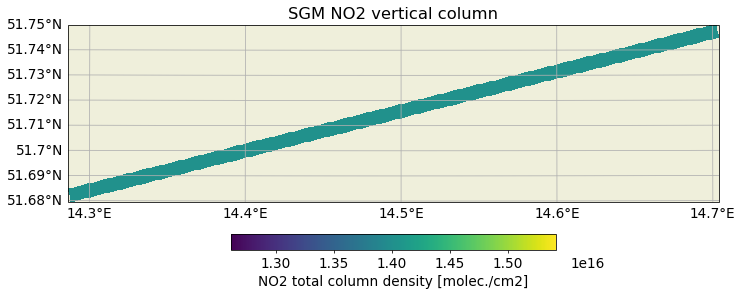

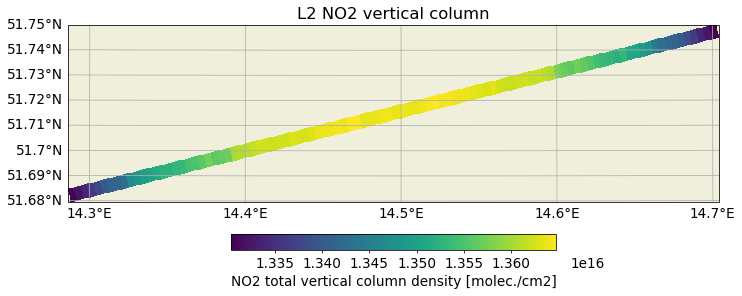

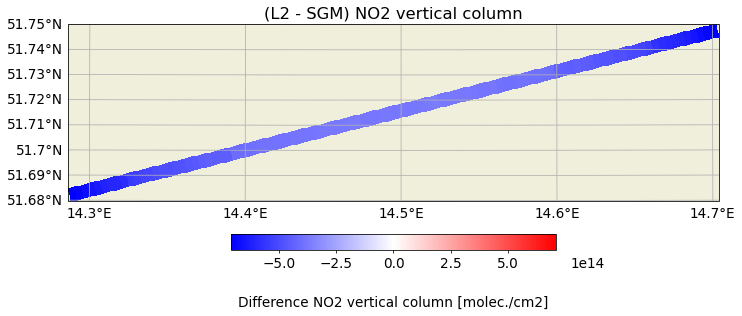

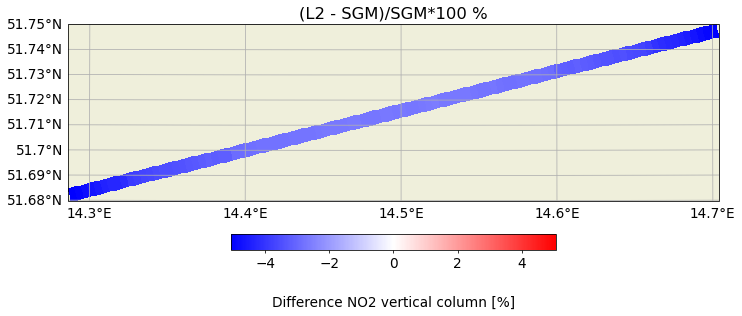

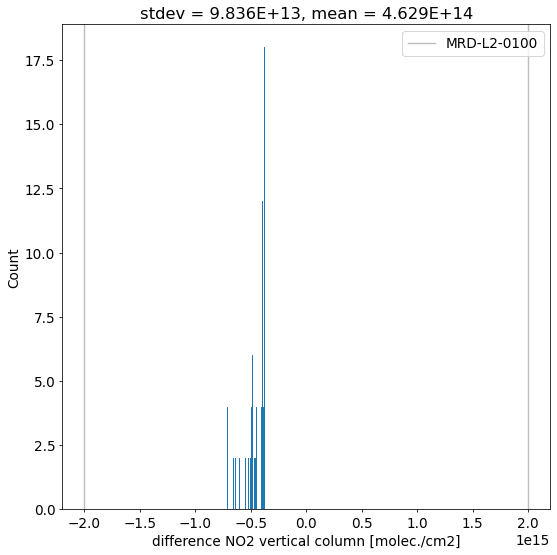

17:23:00 : teds : pam: INFO : Finished PAM


In [26]:
cfg_l2_pam_nonoise = copy.deepcopy(run_E2E.get_specific_config(cfg_nonoise,'pam'))
cfg_l2_pam_nonoise['l2']['run'] = True
cfg_l2_pam_nonoise['l2']['plot_list'] = {'NO2 vertical column':{'f1':'sgm_atm', 'f2':'l2', 'f1_name':'SGM', 'f2_name':'L2', 'f1_var':'col_no2', 'f2_var':'no2_total_vcd', 'req':2E15, 'req_name':'MRD-L2-0100'}}
pam_nitro(cfg_l2_pam_nonoise)

## 8. <a id='toc8_'></a>[Conclusions](#toc0_)

The E2ES can be used to assess to following MRD requirements. The current status of the requirement fulfilment (using the current instrument CKD) is indicated.




| Requirement    | Status   |
| -------------- | -------- |
|  MRD-L2-0050   | ✅       |
|  MRD-L2-0100   | ✅       |
|  MRD-L2-0110   | ✅       |
|  MRD-L1B-0190  | ❌/✅    | 
|  MRD-L1B-0200  | ✅       |     
|  MRD-L1B-0210  | ✅       |    